<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/cda-2021/blob/main/notebooks/cda_2021_03_23_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we start, we need to install two packages:

+ `maxLik` -- package for solving ML problems
+ `extraDistr` -- package that extends base R to provide some extra distributions (such as zero-truncated Poisson distribution)

In [ ]:
install.packages(c("maxLik", "extraDistr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘miscTools’, ‘sandwich’




We need to load packages 

In [ ]:
library(maxLik)
library(extraDistr)

\begin{equation}
   \log L = \sum_i x_i \log \lambda - \sum_i \log(e^\lambda-1) - \sum_i \log(x_i!) 
\end{equation}

In [ ]:
## log-likelihood function
ll <- function(par, x) {
  m <- sum(x)*log(par) - length(x)*log(exp(par)-1)
  m
}

\begin{equation}
    \frac{\partial \log L}{\partial \lambda} = \frac{\sum_i x_i}{\lambda} - \frac{n e^\lambda}{e^\lambda - 1} = 
    \frac{\sum_i x_i}{\lambda} - n \frac{e^\lambda}{e^\lambda - 1}.    
\end{equation}

In [ ]:
## gradient
grad <- function(par, x)  {
  g <- sum(x) / par - length(x)*exp(par)/(exp(par)-1)
  g
}

\begin{equation}
    \frac{\partial^2 \log L}{\partial \lambda^2} =  - \frac{\sum_i x_i}{\lambda^2} + n \frac{e^\lambda}{(e^\lambda-1)^2}.
\end{equation}


In [ ]:
## hessian
hess <- function(par, x) {
  h <- -sum(x)/par^2 + length(x)*exp(par)/(exp(par)-1)^2 
  h
}

Now, we need to generate some data that comes from zero-truncated Poisson distribution.

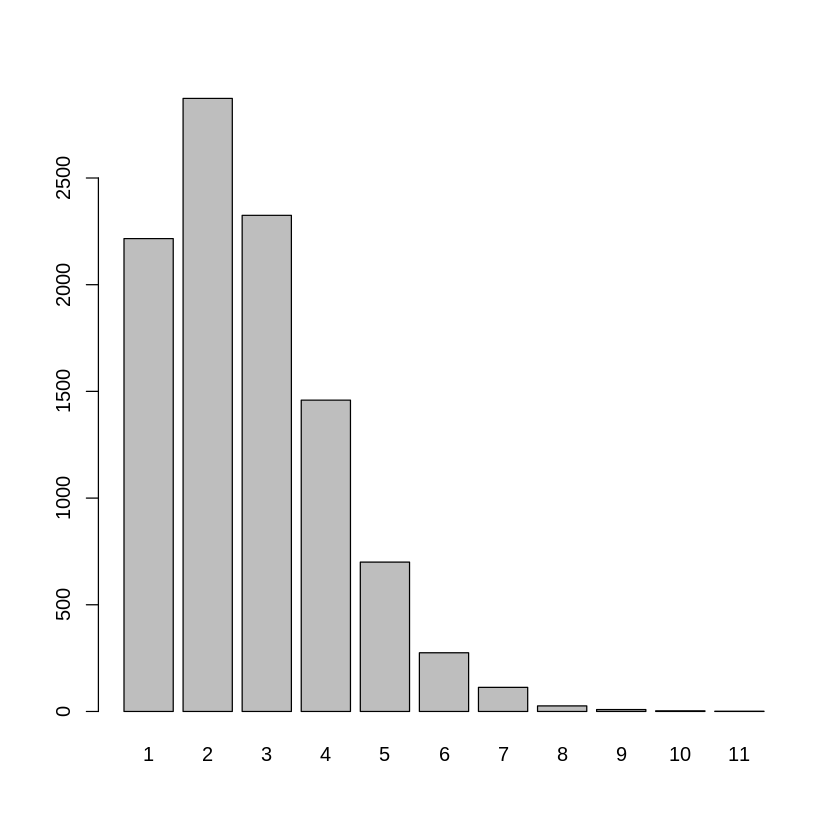

In [ ]:
## generate fake data 
set.seed(123)
x <- rtpois(n = 10000, lambda = 2.5, a = 0) ## random numbers from truncated Poisson (tpois)
#x <- rpois(n= 10000, lambda = 2.5)
barplot(table(x))

First, let's start with maxLik package and provide only log-lik function

In [ ]:
## without gradient and hessian
res <- maxLik(logLik = ll, start = 1, method = "NR", x = x)
summary(res)

--------------------------------------------
Maximum Likelihood estimation
Newton-Raphson maximisation, 6 iterations
Return code 2: successive function values within tolerance limit (tol)
Log-Likelihood: 637.5431 
1  free parameters
Estimates:
     Estimate Std. error t value Pr(> t)    
[1,]  2.47732    0.01714   144.6  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
--------------------------------------------

In [ ]:
## with gradient and hessian
res2 <- maxLik(logLik = ll,  
               grad = grad, 
               hess = hess, 
               start = 1, x = x, method = "NR")
summary(res2)

--------------------------------------------
Maximum Likelihood estimation
Newton-Raphson maximisation, 6 iterations
Return code 1: gradient close to zero (gradtol)
Log-Likelihood: 637.5431 
1  free parameters
Estimates:
     Estimate Std. error t value Pr(> t)    
[1,]  2.47732    0.01713   144.6  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
--------------------------------------------

Doing Newton's method step-by-step

In [ ]:
x_0 <- 1 ## starting point

for (i in 1:10) { 
  
  x_1 <- x_0 - grad(x_0, x)/hess(x_0, x) ## x_{n+1} = x_n - f(x)/f'(x)
  
  cat("current value: ", x_1, "\n")

  if ( abs(x_0 - x_1) < 0.001) {
    cat("Result:", x_1, "\n")
    cat("Algorithm converged after: ", i, " iterations.")
    break()
    
  }
  x_0 <- x_1

}

current value:  1.629258 
current value:  2.210732 
current value:  2.452107 
current value:  2.477094 
current value:  2.477316 
Result: 2.477316 
Algorithm converged after:  5  iterations.

We do the same but specifying log-pdf of zero-truncated Poisson distribution.

In [ ]:
ll <- function(par, x) {
  m <- dtpois(x, lambda = par, a = 0, log = TRUE) ## log-pdf
  sum(m)
}

set.seed(123)
x <- rtpois(10000, lambda = 2.5, a = 0)

## without gradient and hessian
res <- maxLik(logLik = ll, start = 1, x = x, method = "NR")
summary(res)

--------------------------------------------
Maximum Likelihood estimation
Newton-Raphson maximisation, 5 iterations
Return code 8: successive function values within relative tolerance limit (reltol)
Log-Likelihood: -16734.12 
1  free parameters
Estimates:
     Estimate Std. error t value Pr(> t)    
[1,]  2.47732    0.01714   144.6  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
--------------------------------------------